<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

ModuleNotFoundError: No module named 'mlxtend'

### 1. Import the data

In [4]:
ais = pd.read_csv('../../DATA/ais.csv')

### 2. Do some EDA of relationships between features.

In [5]:
ais.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [11]:
ais.columns

Index(['Unnamed: 0', 'rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat',
       'lbm', 'ht', 'wt', 'sex', 'sport'],
      dtype='object')

In [12]:
ais.info

<bound method DataFrame.info of      Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0             1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1             2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2             3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3             4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4             5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   
..          ...   ...  ...   ...   ...   ...    ...    ...     ...    ...   
197         198  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00   
198         199  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00   
199         200  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00   
200         201  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00   
201         202  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00   

        ht    wt sex   sport  
0    195.9  

In [13]:
ais.corr

<bound method DataFrame.corr of      Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0             1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1             2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2             3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3             4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4             5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   
..          ...   ...  ...   ...   ...   ...    ...    ...     ...    ...   
197         198  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00   
198         199  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00   
199         200  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00   
200         201  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00   
201         202  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00   

        ht    wt sex   sport  
0    195.9  

In [8]:
print(ais.describe().T)

            count        mean        std     min       25%      50%      75%  \
Unnamed: 0  202.0  101.500000  58.456537    1.00   51.2500  101.500  151.750   
rcc         202.0    4.718614   0.457976    3.80    4.3725    4.755    5.030   
wcc         202.0    7.108911   1.800337    3.30    5.9000    6.850    8.275   
hc          202.0   43.091584   3.662989   35.90   40.6000   43.500   45.575   
hg          202.0   14.566337   1.362451   11.60   13.5000   14.700   15.575   
ferr        202.0   76.876238  47.501239    8.00   41.2500   65.500   97.000   
bmi         202.0   22.955891   2.863933   16.75   21.0825   22.720   24.465   
ssf         202.0   69.021782  32.565333   28.00   43.8500   58.600   90.350   
pcBfat      202.0   13.507426   6.189826    5.63    8.5450   11.650   18.080   
lbm         202.0   64.873713  13.070197   34.36   54.6675   63.035   74.750   
ht          202.0  180.103960   9.734494  148.90  174.0000  179.700  186.175   
wt          202.0   75.007921  13.925199

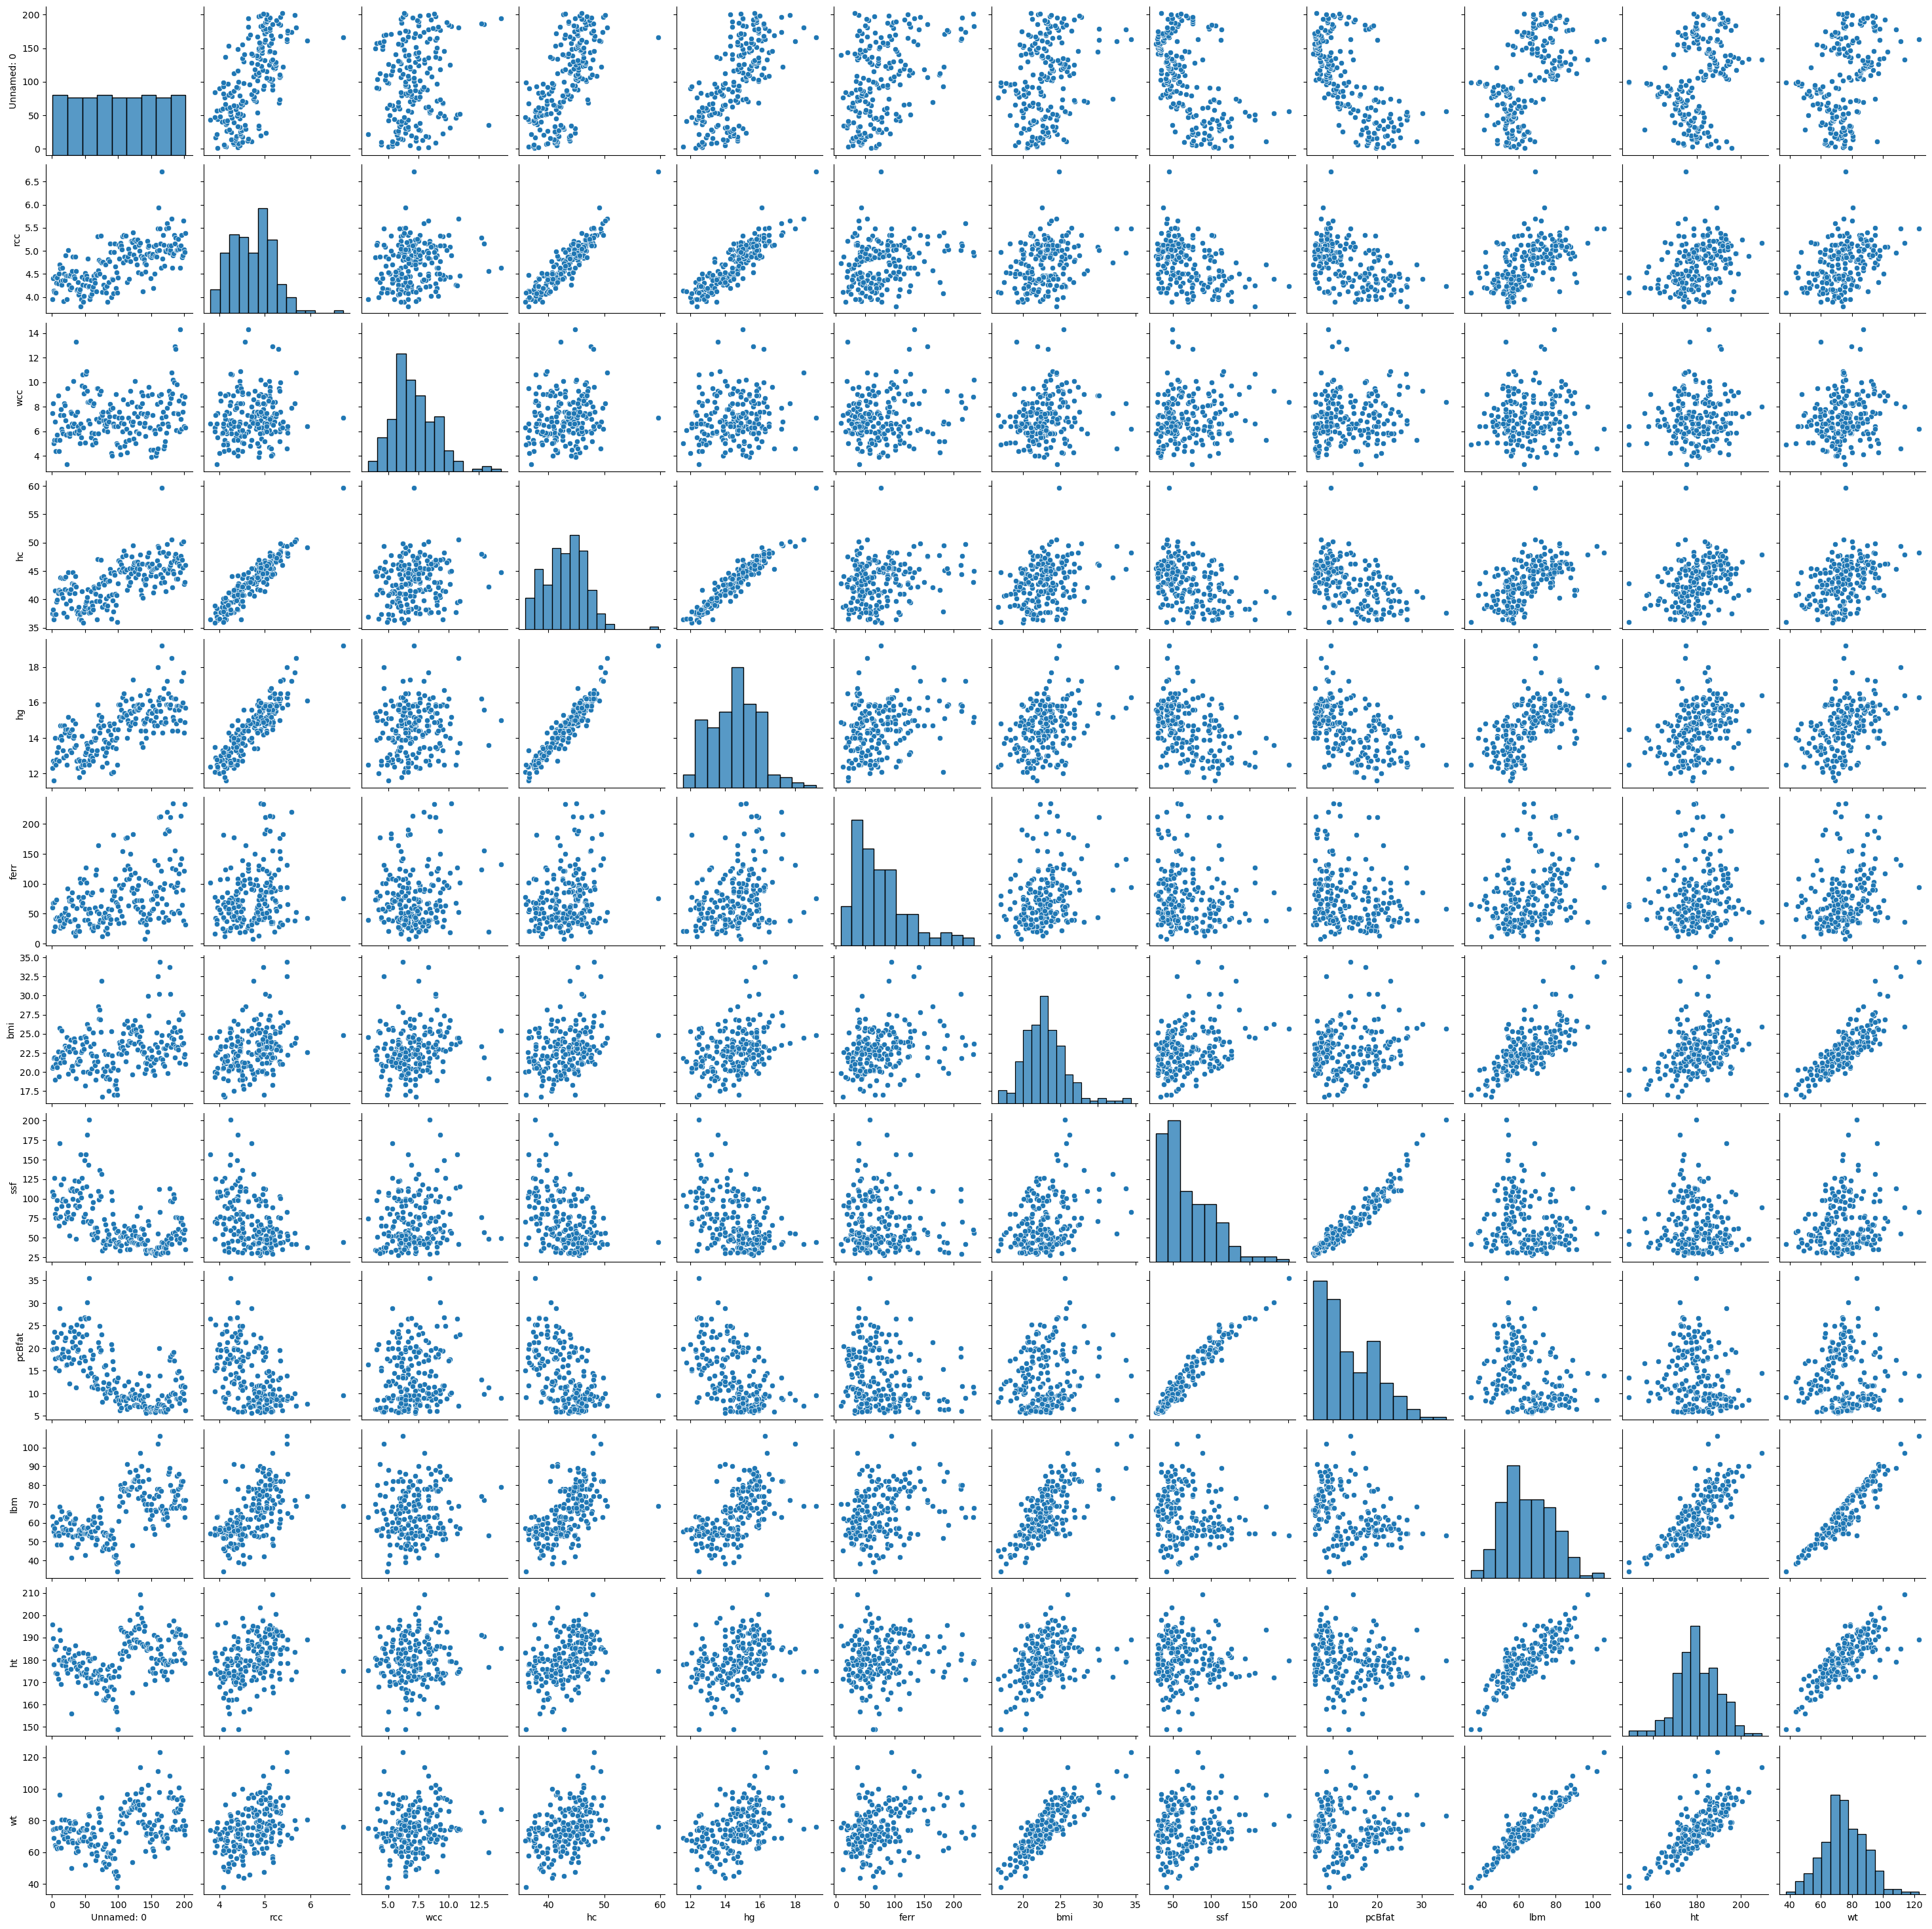

In [10]:
sns.pairplot(ais,)
plt.show()

In [14]:
#null vallues
ais.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [5]:
ais['sex'].value_counts()

m    102
f    100
Name: sex, dtype: int64

In [12]:
ais.dtypes

Unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcBfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [13]:
# ANSWER
x = ais.drop(columns=["sex", "sport"])

In [7]:
#scaled_ais = minmax_scaling(ais, columns=[0])

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xss = scaler.fit_transform(x)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [16]:
# ANSWER
from sklearn.cluster import KMeans

k = 2
# 2 Clusters
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(xss)

KMeans(n_clusters=2)

### 5. Get the labels for the models

In [17]:
# ANSWER
labels_2 = k_mean2.labels_
print(labels_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [18]:
# ANSWER
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xss)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\OEM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

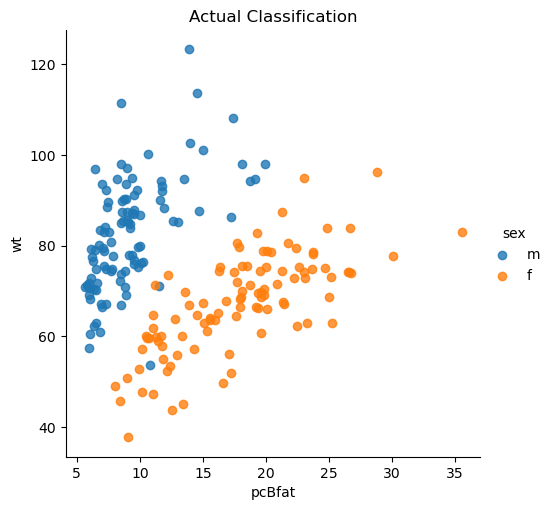

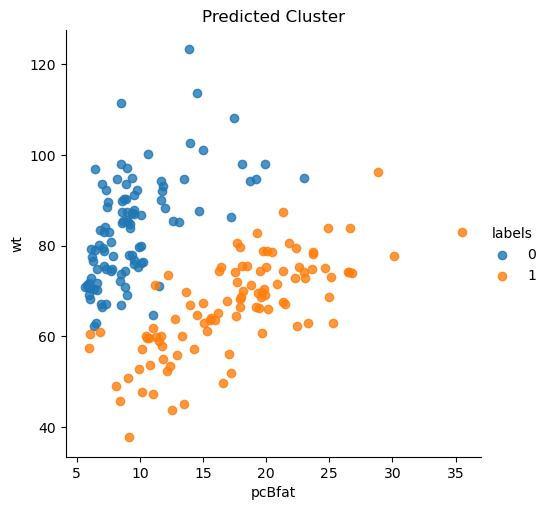

In [19]:
# ANSWER
ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

[[11.9698     93.252     ]
 [11.82595238 56.57142857]
 [21.04362069 72.80862069]
 [ 7.93826923 74.80961538]]


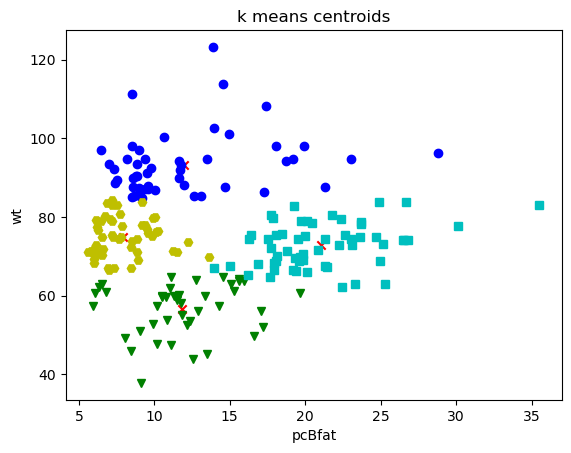

In [21]:
# ANSWER
x1 = np.array(ais['pcBfat'])
x2 = np.array(ais['wt'])

plt.plot()
x = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

K = 4
kmeans_model = KMeans(n_clusters=K).fit(x)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



